In [32]:
## Program written by Nicholas Munoz Homework 9 Problem 15.5 & 16.6
##f(x,y)=x2/2+y2/3−xy/4 
## 16.6
from scipy.optimize import minimize
from mpl_toolkits.mplot3d import axes3d, Axes3D #<-- Note the capitalization!
import matplotlib.pyplot as plt
import numpy as np
x_min,x_max = -2,2
y_min,y_max = -3,3

def f(x,y):
    return (x**2)/2 + (y**2)/3 - (x*y)/4

nx = np.linspace(xstart,xend,100)
ny = np.linspace(ystart,yend,100)
x,y = np.meshgrid(nx,ny)
z = f(x, y)

In [40]:
## SciPy minimization Converted to 1D Array Nelder Mead Method
def init(x_min, x_max, y_min, y_max):
    x0 = x_min+np.random.random()*(x_max-x_min)
    y0 = y_min+np.random.random()*(y_max-y_min)
    return [x0, y0]
def f2(x):
    return 1/2*x[0]**2 + 1/3*x[1]**2 - x[0]*x[1]/4
[x0, y0] = init(xstart, xend, ystart, yend)
res = minimize(f2, [x0,y0], method='nelder-mead', tol=1e-4, options={'disp': True})

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 43
         Function evaluations: 82


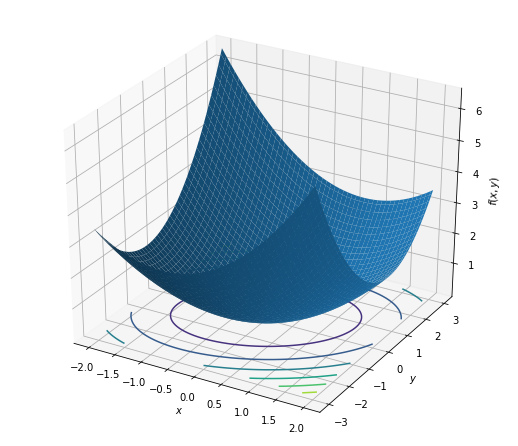

In [37]:
fig = plt.figure(figsize=[7,6])
ax = Axes3D(fig)
ax.plot_surface(x,y,z, alpha=1.0)
cset = ax.contour(x,y,z, zdir='z', offset=0)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$f(x,y)$')
plt.show()

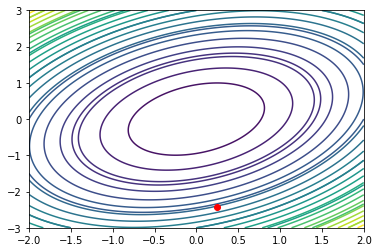

In [43]:
##f(x,y)=x**2/2+y**2/3−xy/4 
##dzdx = x - y/4      
##dzdy = 2y/3 - x/4
##(dzdx,dzdy)
def init(x_min, x_max, y_min, y_max):
    x0 = x_min+np.random.random()*(x_max-x_min)
    y0 = y_min+np.random.random()*(y_max-y_min)
    return [x0, y0]

x_min, x_max = -2, 2
y_min, y_max = -3, 3                   

nx = np.linspace(x_min,x_max,400)
ny = np.linspace(y_min,y_max,400)

x,y = np.meshgrid(nx,ny)
z =f(x,y)
fig = plt.figure()
levels = np.arange(np.min(z), np.max(z), 0.3)
plt.contour(x,y,z, levels=levels)
plt.contour(x,y,z)


x0, y0 = init(x_min, x_max, y_min, y_max)
plt.plot(x0, y0, 'ro')
plt.show()


In [48]:
def derivative(f, xy, d=0.001):
    x, y = xy[0], xy[1]
    fx = (f([x+d/2,y])-f([x-d/2,y]))/d
    fy = (f([x,y+d/2])-f([x,y-d/2]))/d
    #print(fx,fy)
    return np.array([fx,fy])
def minimize_var(f,x0, N=1000):
     
    x_now = x0
    x_prev = None
    converged = False
    x_hist = []
    x_hist.append(x_now)
    for i in range(N):
        
        df_now = derivative(f2, x_now) 
        
        if x_prev is None:
            dx = 0.01
        else:
            df_prev = derivative(f2, x_prev)
            dd = df_now - df_prev
            dx = np.dot(x_now - x_prev, dd) / (np.linalg.norm(dd))**2
        x_next = x_now - df_now*dx
        
        print("step:    ", f(x_now), f(x_next))
        if f(x_next)>f(x_now):
            converged = True
            break
        else:
            x_prev = x_now
            x_now = x_next
            x_hist.append(x_now)

    return converged, np.array(x_hist), f(x_now)

step:     2.004123769497768 1.9725757538691733
step:     1.9725757538691733 0.2612722789516359
step:     0.2612722789516359 0.05338187640109351
step:     0.05338187640109351 0.0023223676394429843
step:     0.0023223676394429843 0.00016917893658600493
step:     0.00016917893658600493 7.84416126407904e-05
step:     7.84416126407904e-05 2.019022711304786e-08
step:     2.019022711304786e-08 5.6415047545713775e-09
step:     5.6415047545713775e-09 3.5521131274371294e-12
step:     3.5521131274371294e-12 1.7423612628191242e-18
step:     1.7423612628191242e-18 2.215807893643201e-18


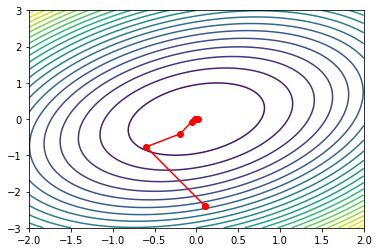

results of f_min:  1.7423612628191242e-18   number of iterations:   11
[ 0.10781118 -2.4083605 ] 2.004123769497768
[-1.54570105e-09  8.27229648e-10] 1.7423612628191242e-18


In [49]:
[x0, y0] = init(x_min, x_max, y_min, y_max)
converged, x_hist, f_min = minimize_var(f2, [x0,y0])
x,y = np.meshgrid(nx,ny)
z = f(x,y)
fig = plt.figure()
levels = np.arange(np.min(z), np.max(z), 0.3)
plt.contour(x,y,z, levels=levels)

plt.plot(x_hist[:,0], x_hist[:,1], 'ro-')
plt.show()
print('results of f_min: ', f_min, '  number of iterations:  ', len(x_hist))
print(x_hist[0], f2(x_hist[0]))
print(x_hist[-1], f2(x_hist[-1]))

In [51]:
## Following the wikipedia page this program shows that we will initialize our first 
## current value is the next step value to gauge the direction of the function
## The for loop then iterates over a number of N times until it approaches a reasonable minimum value
## while ensuring that there is no overstep and improving accuracy based on the pre - set precision
x_next = 4  
gamma = 0.01 ## Change in step size 
precision = 0.00001  
N = 10000  # Maximum number of iteration

def df(x): ## This is our function that we will be finding the gradient of
    return x**3 -5*x**2 -3

for _i in range(N):
    x_now = x_next
    x_next = x_now - gamma * df(x_now) 

    step = x_next - x_now
    if abs(step) <= precision:
        break

print("Minimum at ", x_next)


Minimum at  5.114656751460553


In [63]:
# Monte Carlo Minimize
# We'll be using the same function from our code above in 16.6
# And using the same initialized values for x_min and y_min
from random import random

    


def MCmin(N, f, xstart, xend, ystart, yend):
    ## We want to generate random pairs numbers within our regions of x & y
    x_region = xend - xstart  
    y_region = yend - ystart  
   
    xmin, ymin = x_region*random() + x_min, y_region*random() + y_min
    
    for i in range(N):
        
        x = x_region*random() + x_min 
        y = y_region*random() + y_min
        ## if xmin and ymin are our limiting values when plugged back into the function then x and y then assume
        ## those since if f(x)<f(minimum) then x cannot exceed our minimum value
        if f(x, y) < f(xmin, ymin):
            xmin, ymin = x, y
            
    return xmin, ymin, f(xmin, ymin)

In [64]:
x, y, fmin = MCmin(int(1e6), f, -2, 2, -3, 3)
print("Minimum: x,y=","(", x,",",y,")")
print("f(x,y)=", fmin)

Minimum: x,y= ( -0.0007968890547727092 , -0.0010141152035707535 )
f(x,y)= 4.582916383450217e-07
